In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
amazon = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header=None)
amazon.columns = ['review', 'positive']
amazon.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [39]:
keywords = ['good', 'great', 'must have', 'highly recommend', 'well', 'nice', 'love', 'best', 'will order', 'super', 'excellent', 'well', 'beautiful', 'works']
#keywords = ['don\'t', 'doesn\'t', 'no way', 'but', 'disappointed', 'too', 'forget about it', 'waste', 'poor', 'broke', 'do not', 'wrongly', 'couldn\'t', 'didn\'t' ]
for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(str(key), case=False)
    

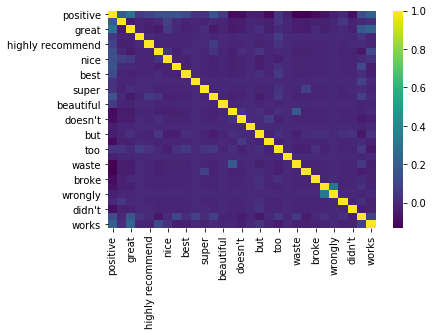

In [40]:
sns.heatmap(amazon.corr(), cmap='viridis')
plt.show()

In [41]:
amazon.head()

,review,positive,good,great,must have,highly recommend,well,nice,love,best,...,forget about it,waste,poor,broke,do not,wrongly,couldn't,didn't,!,works
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
data = amazon[keywords]
target = amazon['positive']

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

from sklearn.metrics import classification_report
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.94      0.79       500
           1       0.90      0.56      0.69       500

   micro avg       0.75      0.75      0.75      1000
   macro avg       0.79      0.75      0.74      1000
weighted avg       0.79      0.75      0.74      1000

